# Make confidence interval for the generated data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from src.ML_estimation import gen_data_and_ml_estimation

factor_loading_list = [0.45, 0.45, 0.45]
pd_list = [0.0015, 0.0100, 0.0500]
# pd_list2 = [0.005, 0.0100, 0.0500]
gamma_list = norm.ppf(pd_list)
num_of_obligors_list = [400, 250, 100]

# Make a pandas dataframe with Grade, Factor Loading, PD, Gamma, Num of Obligors
df = pd.DataFrame({'Grade': ['A', 'B', 'C'], 'Factor Loading': factor_loading_list, 'PD': pd_list, 'Gamma': gamma_list, 'Num of Obligors': num_of_obligors_list})
df

,Grade,Factor Loading,PD,Gamma,Num of Obligors
0,A,0.45,0.0015,-2.967738,400
1,B,0.45,0.0100,-2.326348,250
2,C,0.45,0.0500,-1.644854,100


# Generate data and estimate the parameters using MLE2 estimation

In [177]:
ml_params_20 = gen_data_and_ml_estimation(20, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)

In [ ]:
ml_params_40 = gen_data_and_ml_estimation(40, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)

In [ ]:
ml_params_80 = gen_data_and_ml_estimation(80, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)

In [ ]:
ml_params_160 = gen_data_and_ml_estimation(160, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)

In [2]:
ml_params_20 = pd.read_csv("data\conf_interval_MLE\conf_interval_ml_20.csv")
ml_params_20 = ml_params_20.iloc[:500]

In [3]:
ml_params_40 = pd.read_csv("data\conf_interval_MLE\conf_interval_ml_40.csv")
ml_params_40 = ml_params_40.iloc[:500]

In [4]:
ml_params_80 = pd.read_csv("data\conf_interval_MLE\conf_interval_ml_80.csv")
ml_params_80 = ml_params_80.iloc[:500]

In [5]:
ml_params_160 = pd.read_csv("data\conf_interval_MLE\conf_interval_ml_160.csv")
ml_params_160 = ml_params_160.iloc[-100:]

# Plot the confidence interval for MLE2

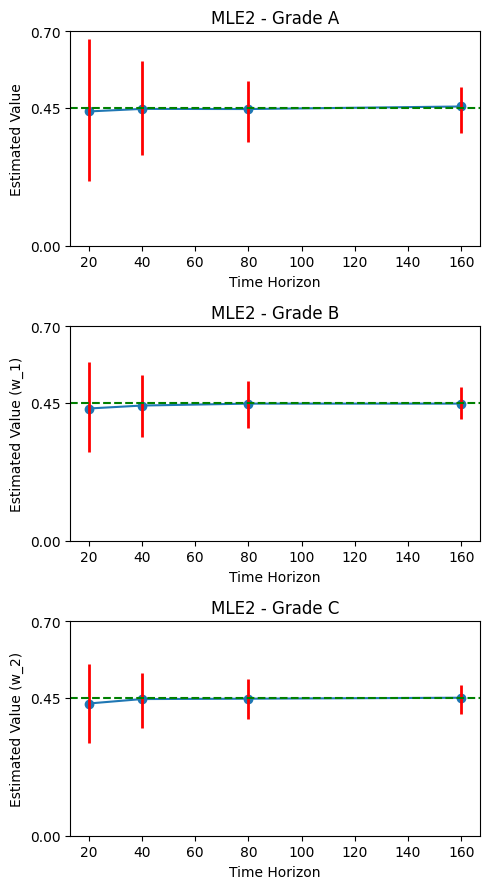

In [6]:
# Do the 3 plot in the same figure as subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 9))

# Plot for w_0
x = [20, 40, 80, 160]
y_median = [ml_params_20["w_0"].median(), ml_params_40["w_0"].median(), ml_params_80["w_0"].median(), ml_params_160["w_0"].median()]
y_5th = [ml_params_20["w_0"].quantile(0.05), ml_params_40["w_0"].quantile(0.05), ml_params_80["w_0"].quantile(0.05), ml_params_160["w_0"].quantile(0.05)]
y_95th = [ml_params_20["w_0"].quantile(0.95), ml_params_40["w_0"].quantile(0.95), ml_params_80["w_0"].quantile(0.95), ml_params_160["w_0"].quantile(0.95)]

axs[0].plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    axs[0].vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
axs[0].axhline(y=0.45, color='g', linestyle='--')
axs[0].set_title('MLE2 - Grade A')
axs[0].set_xlabel('Time Horizon')
axs[0].set_ylabel('Estimated Value')
axs[0].set_ylim(0, 0.7)
axs[0].set_yticks([0, 0.45, 0.7])

# Plot for w_1
y_median = [ml_params_20["w_1"].median(), ml_params_40["w_1"].median(), ml_params_80["w_1"].median(), ml_params_160["w_1"].median()]
y_5th = [ml_params_20["w_1"].quantile(0.05), ml_params_40["w_1"].quantile(0.05), ml_params_80["w_1"].quantile(0.05), ml_params_160["w_1"].quantile(0.05)]
y_95th = [ml_params_20["w_1"].quantile(0.95), ml_params_40["w_1"].quantile(0.95), ml_params_80["w_1"].quantile(0.95), ml_params_160["w_1"].quantile(0.95)]

axs[1].plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    axs[1].vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
axs[1].axhline(y=0.45, color='g', linestyle='--')
axs[1].set_title('MLE2 - Grade B')
axs[1].set_xlabel('Time Horizon')
axs[1].set_ylabel('Estimated Value (w_1)')
axs[1].set_ylim(0, 0.7)
axs[1].set_yticks([0, 0.45, 0.7])

# Plot for w_2
y_median = [ml_params_20["w_2"].median(), ml_params_40["w_2"].median(), ml_params_80["w_2"].median(), ml_params_160["w_2"].median()]
y_5th = [ml_params_20["w_2"].quantile(0.05), ml_params_40["w_2"].quantile(0.05), ml_params_80["w_2"].quantile(0.05), ml_params_160["w_2"].quantile(0.05)]
y_95th = [ml_params_20["w_2"].quantile(0.95), ml_params_40["w_2"].quantile(0.95), ml_params_80["w_2"].quantile(0.95), ml_params_160["w_2"].quantile(0.95)]

axs[2].plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    axs[2].vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
axs[2].axhline(y=0.45, color='g', linestyle='--')
axs[2].set_title('MLE2 - Grade C')
axs[2].set_xlabel('Time Horizon')
axs[2].set_ylabel('Estimated Value (w_2)')
axs[2].set_ylim(0, 0.7)
axs[2].set_yticks([0, 0.45, 0.7])

plt.tight_layout()
plt.show()

# Same w case (MLE3)

In [ ]:
ml_same_w_20 = gen_data_and_ml_estimation(20, num_of_obligors_list, [0.45], gamma_list, sims=500)

In [ ]:
ml_same_w_30 = gen_data_and_ml_estimation(30, num_of_obligors_list, [0.45], gamma_list, sims=500)

In [30]:
ml_same_w_40 = gen_data_and_ml_estimation(40, num_of_obligors_list, [0.45], gamma_list, sims=500)

In [ ]:
ml_same_w_80 = gen_data_and_ml_estimation(80, num_of_obligors_list, [0.45], gamma_list, sims=500)

In [ ]:
ml_same_w_160 = gen_data_and_ml_estimation(160, num_of_obligors_list, [0.45], gamma_list, sims=500)

In [ ]:
ml_same_w_20.to_csv("data\conf_interval_MLE\conf_interval_ml_20_same_w.csv", index=False)
ml_same_w_30.to_csv("data\conf_interval_MLE\conf_interval_ml_30_same_w.csv", index=False)
ml_same_w_40.to_csv("data\conf_interval_MLE\conf_interval_ml_40_same_w.csv", index=False)
ml_same_w_80.to_csv("data\conf_interval_MLE\conf_interval_ml_80_same_w.csv", index=False)
ml_same_w_160.to_csv("data\conf_interval_MLE\conf_interval_ml_160_same_w.csv", index=False)

In [7]:
ml_same_w_20 = pd.read_csv("data\conf_interval_MLE\conf_interval_ml_20_same_w.csv")
ml_same_w_30 = pd.read_csv("data\conf_interval_MLE\conf_interval_ml_30_same_w.csv")
ml_same_w_40 = pd.read_csv("data\conf_interval_MLE\conf_interval_ml_40_same_w.csv")
ml_same_w_80 = pd.read_csv("data\conf_interval_MLE\conf_interval_ml_80_same_w.csv")
ml_same_w_160 = pd.read_csv("data\conf_interval_MLE\conf_interval_ml_160_same_w.csv")

In [112]:
ml_same_w_20.shape, ml_same_w_40.shape, ml_same_w_80.shape, ml_same_w_160.shape

((500, 4), (500, 4), (500, 4), (500, 4))

# Plot the confidence interval for ML estimation for the same w case

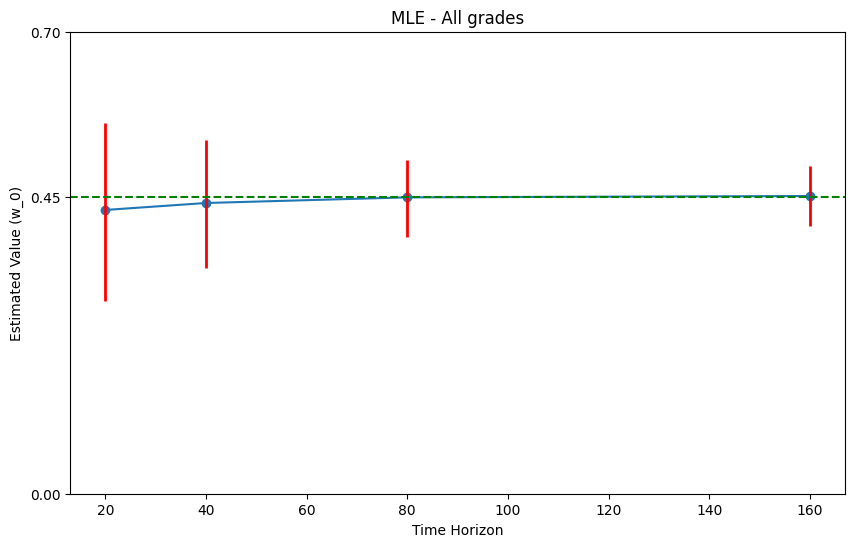

In [8]:
# Make a plot for the confidence interval for ML estimation for w_0
# Plot the median and the 5th and 95th percentiles
x = [20, 40, 80, 160]
y_median = [ml_same_w_20["w_0"].median(), ml_same_w_40["w_0"].median(), ml_same_w_80["w_0"].median(), ml_same_w_160["w_0"].median()]
y_5th = [ml_same_w_20["w_0"].quantile(0.05), ml_same_w_40["w_0"].quantile(0.05), ml_same_w_80["w_0"].quantile(0.05), ml_same_w_160["w_0"].quantile(0.05)]
y_95th = [ml_same_w_20["w_0"].quantile(0.95), ml_same_w_40["w_0"].quantile(0.95), ml_same_w_80["w_0"].quantile(0.95), ml_same_w_160["w_0"].quantile(0.95)]

plt.figure(figsize=(10, 6))
plt.plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    plt.vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
# Draw a horizontal line at y=0.45
plt.axhline(y=0.45, color='g', linestyle='--')

plt.title('MLE - All grades')
plt.xlabel('Time Horizon')
plt.ylabel('Estimated Value (w_0)')
plt.ylim(0, 0.7)
plt.yticks([0, 0.45, 0.7])
#plt.legend(['Median', '5th and 95th Percentiles'], loc='lower right')

plt.savefig("plots/confidence_interval_ML_same_w.pdf")
plt.show()

# MLE by buckets (MLE1)

In [ ]:
from src.ML_estimation import gen_data_and_mle1

In [ ]:
mle1_20 = gen_data_and_mle1(20, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)
mle1_40 = gen_data_and_mle1(40, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)
mle1_80 = gen_data_and_mle1(80, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)
mle1_160 = gen_data_and_mle1(160, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)

In [9]:
mle1_20 = pd.read_csv("data\conf_interval_MLE\conf_interval_mle1_20.csv")
mle1_40 = pd.read_csv("data\conf_interval_MLE\conf_interval_mle1_40.csv")
mle1_80 = pd.read_csv("data\conf_interval_MLE\conf_interval_mle1_80.csv")
mle1_160 = pd.read_csv("data\conf_interval_MLE\conf_interval_mle1_160.csv")

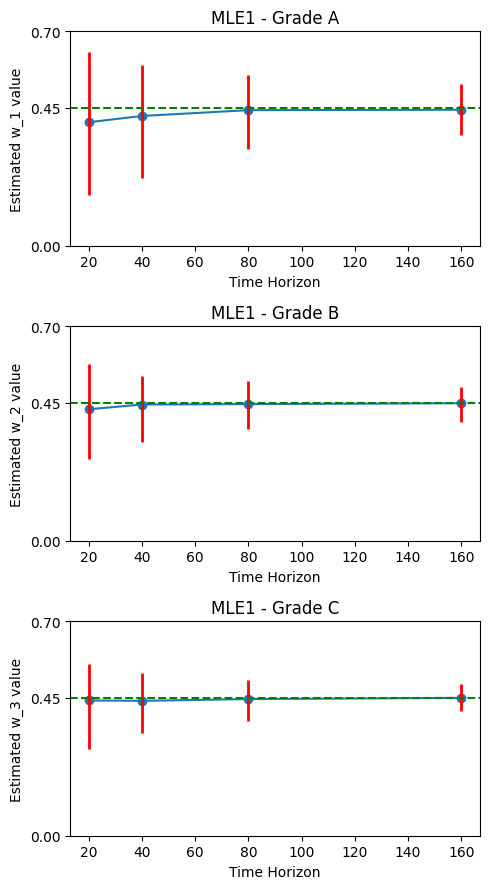

In [10]:
# Do the 3 plot in the same figure as subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 9))

# Plot for w_0
x = [20, 40, 80, 160]
y_median = [mle1_20["w_0"].median(), mle1_40["w_0"].median(), mle1_80["w_0"].median(), mle1_160["w_0"].median()]
y_5th = [mle1_20["w_0"].quantile(0.05), mle1_40["w_0"].quantile(0.05), mle1_80["w_0"].quantile(0.05), mle1_160["w_0"].quantile(0.05)]
y_95th = [mle1_20["w_0"].quantile(0.95), mle1_40["w_0"].quantile(0.95), mle1_80["w_0"].quantile(0.95), mle1_160["w_0"].quantile(0.95)]

axs[0].plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    axs[0].vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
axs[0].axhline(y=0.45, color='g', linestyle='--')
axs[0].set_title('MLE1 - Grade A')
axs[0].set_xlabel('Time Horizon')
axs[0].set_ylabel('Estimated w_1 value')
axs[0].set_ylim(0, 0.7)
axs[0].set_yticks([0, 0.45, 0.7])

# Plot for w_1
y_median = [mle1_20["w_1"].median(), mle1_40["w_1"].median(), mle1_80["w_1"].median(), mle1_160["w_1"].median()]
y_5th = [mle1_20["w_1"].quantile(0.05), mle1_40["w_1"].quantile(0.05), mle1_80["w_1"].quantile(0.05), mle1_160["w_1"].quantile(0.05)]
y_95th = [mle1_20["w_1"].quantile(0.95), mle1_40["w_1"].quantile(0.95), mle1_80["w_1"].quantile(0.95), mle1_160["w_1"].quantile(0.95)]

axs[1].plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    axs[1].vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
axs[1].axhline(y=0.45, color='g', linestyle='--')
axs[1].set_title('MLE1 - Grade B')
axs[1].set_xlabel('Time Horizon')
axs[1].set_ylabel('Estimated w_2 value')
axs[1].set_ylim(0, 0.7)
axs[1].set_yticks([0, 0.45, 0.7])

# Plot for w_2
y_median = [mle1_20["w_2"].median(), mle1_40["w_2"].median(), mle1_80["w_2"].median(), mle1_160["w_2"].median()]
y_5th = [mle1_20["w_2"].quantile(0.05), mle1_40["w_2"].quantile(0.05), mle1_80["w_2"].quantile(0.05), mle1_160["w_2"].quantile(0.05)]
y_95th = [mle1_20["w_2"].quantile(0.95), mle1_40["w_2"].quantile(0.95), mle1_80["w_2"].quantile(0.95), mle1_160["w_2"].quantile(0.95)]

axs[2].plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    axs[2].vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
axs[2].axhline(y=0.45, color='g', linestyle='--')
axs[2].set_title('MLE1 - Grade C')
axs[2].set_xlabel('Time Horizon')
axs[2].set_ylabel('Estimated w_3 value')
axs[2].set_ylim(0, 0.7)
axs[2].set_yticks([0, 0.45, 0.7])

plt.tight_layout()
plt.show()

# Confidence interval for MM estimation

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from src.MM_estimation import gen_data_and_mm

In [12]:
factor_loading_list = [0.45, 0.45, 0.45]
pd_list = [0.0015, 0.0100, 0.0500]
# pd_list2 = [0.005, 0.0100, 0.0500]
gamma_list = norm.ppf(pd_list)
num_of_obligors_list = [400, 250, 100]

# Make a pandas dataframe with Grade, Factor Loading, PD, Gamma, Num of Obligors
df = pd.DataFrame({'Grade': ['A', 'B', 'C'], 'Factor Loading': factor_loading_list, 'PD': pd_list, 'Gamma': gamma_list, 'Num of Obligors': num_of_obligors_list})
df

,Grade,Factor Loading,PD,Gamma,Num of Obligors
0,A,0.45,0.0015,-2.967738,400
1,B,0.45,0.0100,-2.326348,250
2,C,0.45,0.0500,-1.644854,100


In [12]:
params_df_20 = gen_data_and_mm(20, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)
params_df_30 = gen_data_and_mm(30, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)
params_df_40 = gen_data_and_mm(40, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)
params_df_80 = gen_data_and_mm(80, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)
params_df_160 = gen_data_and_mm(160, num_of_obligors_list, factor_loading_list, gamma_list, sims=500)

In [21]:
# Write the results to csv files in data\conf_interval_MM folder
params_df_20.to_csv("data\conf_interval_MM\conf_interval_mm_20.csv", index=False)
params_df_30.to_csv("data\conf_interval_MM\conf_interval_mm_30.csv", index=False)
params_df_40.to_csv("data\conf_interval_MM\conf_interval_mm_40.csv", index=False)
params_df_80.to_csv("data\conf_interval_MM\conf_interval_mm_80.csv", index=False)
params_df_160.to_csv("data\conf_interval_MM\conf_interval_mm_160.csv", index=False)

In [13]:
params_df_20 = pd.read_csv("data\conf_interval_MM\conf_interval_mm_20.csv")
params_df_30 = pd.read_csv("data\conf_interval_MM\conf_interval_mm_30.csv")
params_df_40 = pd.read_csv("data\conf_interval_MM\conf_interval_mm_40.csv")
params_df_80 = pd.read_csv("data\conf_interval_MM\conf_interval_mm_80.csv")
params_df_160 = pd.read_csv("data\conf_interval_MM\conf_interval_mm_160.csv")

In [14]:
params_df_20.shape, params_df_40.shape, params_df_80.shape, params_df_160.shape

((500, 6), (500, 6), (500, 6), (500, 6))

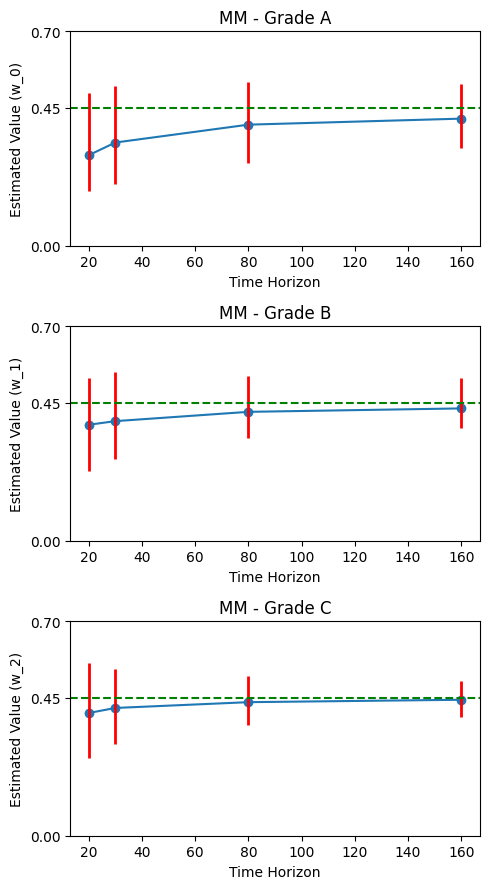

In [158]:
# Do the 3 plot in the same figure as subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 9))

# Plot for w_0
x = [20, 40, 80, 160]
y_median = [params_df_20["w_0"].median(), params_df_40["w_0"].median(), params_df_80["w_0"].median(), params_df_160["w_0"].median()]
y_5th = [params_df_20["w_0"].quantile(0.05), params_df_40["w_0"].quantile(0.05), params_df_80["w_0"].quantile(0.05), params_df_160["w_0"].quantile(0.05)]
y_95th = [params_df_20["w_0"].quantile(0.95), params_df_40["w_0"].quantile(0.95), params_df_80["w_0"].quantile(0.95), params_df_160["w_0"].quantile(0.95)]

axs[0].plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    axs[0].vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
axs[0].axhline(y=0.45, color='g', linestyle='--')
axs[0].set_title('MM - Grade A')
axs[0].set_xlabel('Time Horizon')
axs[0].set_ylabel('Estimated Value (w_0)')
axs[0].set_ylim(0, 0.7)
axs[0].set_yticks([0, 0.45, 0.7])

# Plot for w_1
y_median = [params_df_20["w_1"].median(), params_df_40["w_1"].median(), params_df_80["w_1"].median(), params_df_160["w_1"].median()]
y_5th = [params_df_20["w_1"].quantile(0.05), params_df_40["w_1"].quantile(0.05), params_df_80["w_1"].quantile(0.05), params_df_160["w_1"].quantile(0.05)]
y_95th = [params_df_20["w_1"].quantile(0.95), params_df_40["w_1"].quantile(0.95), params_df_80["w_1"].quantile(0.95), params_df_160["w_1"].quantile(0.95)]

axs[1].plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    axs[1].vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
axs[1].axhline(y=0.45, color='g', linestyle='--')
axs[1].set_title('MM - Grade B')
axs[1].set_xlabel('Time Horizon')
axs[1].set_ylabel('Estimated Value (w_1)')
axs[1].set_ylim(0, 0.7)
axs[1].set_yticks([0, 0.45, 0.7])

# Plot for w_2
y_median = [params_df_20["w_2"].median(), params_df_40["w_2"].median(), params_df_80["w_2"].median(), params_df_160["w_2"].median()]
y_5th = [params_df_20["w_2"].quantile(0.05), params_df_40["w_2"].quantile(0.05), params_df_80["w_2"].quantile(0.05), params_df_160["w_2"].quantile(0.05)]
y_95th = [params_df_20["w_2"].quantile(0.95), params_df_40["w_2"].quantile(0.95), params_df_80["w_2"].quantile(0.95), params_df_160["w_2"].quantile(0.95)]

axs[2].plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    axs[2].vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
axs[2].axhline(y=0.45, color='g', linestyle='--')
axs[2].set_title('MM - Grade C')
axs[2].set_xlabel('Time Horizon')
axs[2].set_ylabel('Estimated Value (w_2)')
axs[2].set_ylim(0, 0.7)
axs[2].set_yticks([0, 0.45, 0.7])

plt.tight_layout()
plt.show()

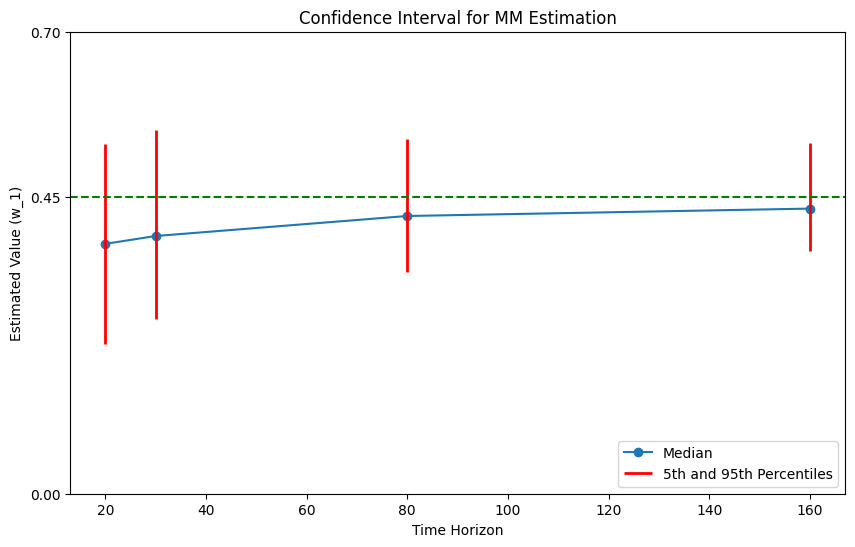

In [152]:
# Make a plot for the confidence interval for MM estimation for w_1
# Plot the median and the 5th and 95th percentiles
x = [20, 40, 80, 160]
y_median = [params_df_20["w_1"].median(), params_df_40["w_1"].median(), params_df_80["w_1"].median(), params_df_160["w_1"].median()]
y_5th = [params_df_20["w_1"].quantile(0.05), params_df_40["w_1"].quantile(0.05), params_df_80["w_1"].quantile(0.05), params_df_160["w_1"].quantile(0.05)]
y_95th = [params_df_20["w_1"].quantile(0.95), params_df_40["w_1"].quantile(0.95), params_df_80["w_1"].quantile(0.95), params_df_160["w_1"].quantile(0.95)]

plt.figure(figsize=(10, 6))
plt.plot(x, y_median, marker='o', linestyle='-')
for i in range(len(x)):
    plt.vlines(x[i], y_5th[i], y_95th[i], colors='r', linestyles='solid', linewidth=2)
# Draw a horizontal line at y=0.45
plt.axhline(y=0.45, color='g', linestyle='--')

plt.title('Confidence Interval for MM Estimation')
plt.xlabel('Time Horizon')
plt.ylabel('Estimated Value (w_1)')
# Make y axis start from 0 to 0.7 and only appear 0, 0.45 and 0.7 as labels
plt.ylim(0, 0.7)
plt.yticks([0, 0.45, 0.7])
plt.legend(['Median', '5th and 95th Percentiles'], loc='lower right')

# save the plot to plots folder
plt.savefig("plots/confidence_interval_MM_w1.pdf")
plt.show()

# Plots in one figure

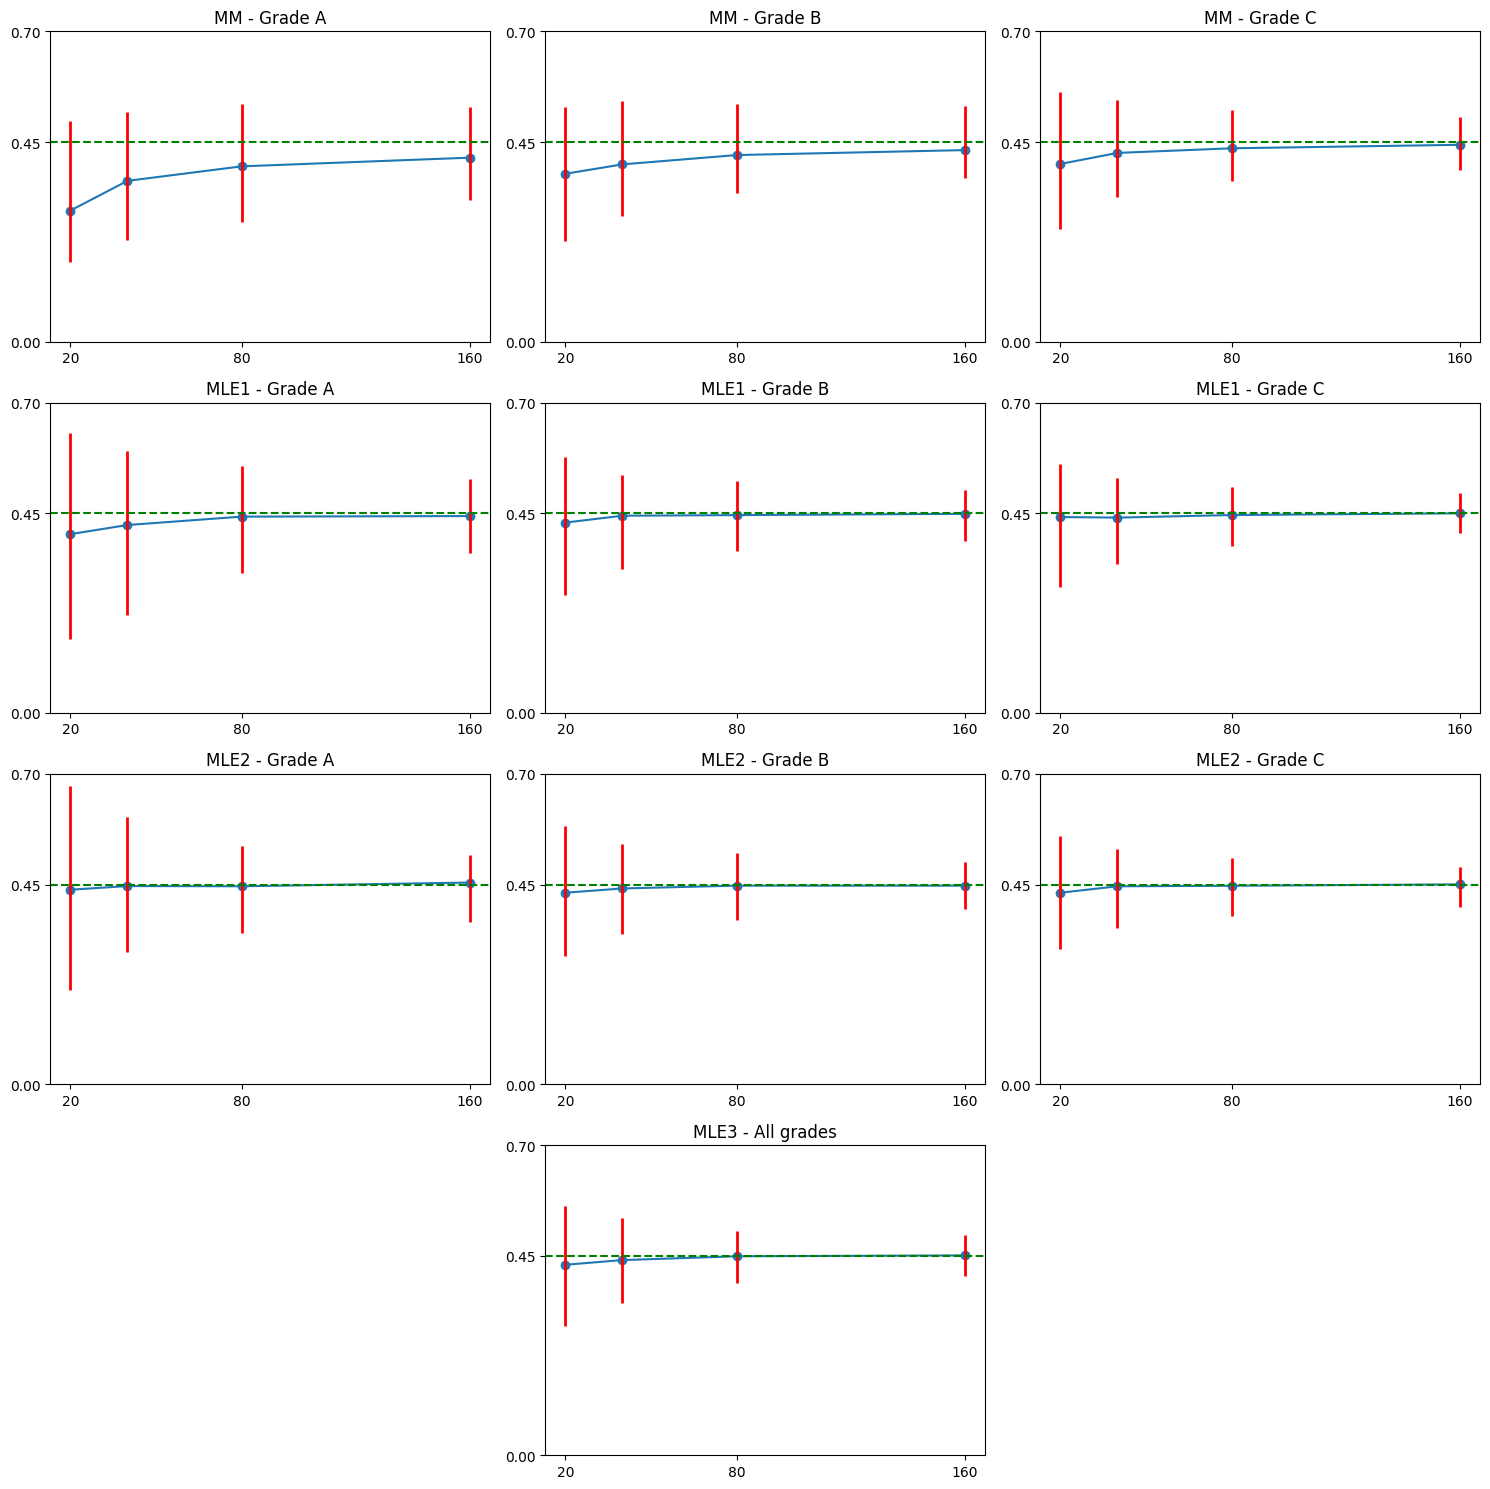

In [15]:
# Make a plot as above but add 1 more row with MLE1
# the order of rows: MM, MLE1, MLE, same w
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Plot for w_0
x = [20, 40, 80, 160]
y_median_w0_mm = [params_df_20["w_0"].median(), params_df_40["w_0"].median(), params_df_80["w_0"].median(), params_df_160["w_0"].median()]
y_5th_w0_mm = [params_df_20["w_0"].quantile(0.05), params_df_40["w_0"].quantile(0.05), params_df_80["w_0"].quantile(0.05), params_df_160["w_0"].quantile(0.05)]
y_95th_w0_mm = [params_df_20["w_0"].quantile(0.95), params_df_40["w_0"].quantile(0.95), params_df_80["w_0"].quantile(0.95), params_df_160["w_0"].quantile(0.95)]

axs[0, 0].plot(x, y_median_w0_mm, marker='o', linestyle='-')
for i in range(len(x)):
    axs[0, 0].vlines(x[i], y_5th_w0_mm[i], y_95th_w0_mm[i], colors='r', linestyles='solid', linewidth=2)
axs[0, 0].set_title('MM - Grade A')

# Plot for w_1
y_median_w1_mm = [params_df_20["w_1"].median(), params_df_40["w_1"].median(), params_df_80["w_1"].median(), params_df_160["w_1"].median()]
y_5th_w1_mm = [params_df_20["w_1"].quantile(0.05), params_df_40["w_1"].quantile(0.05), params_df_80["w_1"].quantile(0.05), params_df_160["w_1"].quantile(0.05)]
y_95th_w1_mm = [params_df_20["w_1"].quantile(0.95), params_df_40["w_1"].quantile(0.95), params_df_80["w_1"].quantile(0.95), params_df_160["w_1"].quantile(0.95)]

axs[0, 1].plot(x, y_median_w1_mm, marker='o', linestyle='-')
for i in range(len(x)):
    axs[0, 1].vlines(x[i], y_5th_w1_mm[i], y_95th_w1_mm[i], colors='r', linestyles='solid', linewidth=2)
axs[0, 1].set_title('MM - Grade B')

# Plot for w_2
y_median_w2_mm = [params_df_20["w_2"].median(), params_df_40["w_2"].median(), params_df_80["w_2"].median(), params_df_160["w_2"].median()]
y_5th_w2_mm = [params_df_20["w_2"].quantile(0.05), params_df_40["w_2"].quantile(0.05), params_df_80["w_2"].quantile(0.05), params_df_160["w_2"].quantile(0.05)]
y_95th_w2_mm = [params_df_20["w_2"].quantile(0.95), params_df_40["w_2"].quantile(0.95), params_df_80["w_2"].quantile(0.95), params_df_160["w_2"].quantile(0.95)]

axs[0, 2].plot(x, y_median_w2_mm, marker='o', linestyle='-')
for i in range(len(x)):
    axs[0, 2].vlines(x[i], y_5th_w2_mm[i], y_95th_w2_mm[i], colors='r', linestyles='solid', linewidth=2)
axs[0, 2].set_title('MM - Grade C')

# Plot for w_0
y_median_w0_ml1 = [mle1_20["w_0"].median(), mle1_40["w_0"].median(), mle1_80["w_0"].median(), mle1_160["w_0"].median()]
y_5th_w0_ml1 = [mle1_20["w_0"].quantile(0.05), mle1_40["w_0"].quantile(0.05), mle1_80["w_0"].quantile(0.05), mle1_160["w_0"].quantile(0.05)]
y_95th_w0_ml1 = [mle1_20["w_0"].quantile(0.95), mle1_40["w_0"].quantile(0.95), mle1_80["w_0"].quantile(0.95), mle1_160["w_0"].quantile(0.95)]

axs[1, 0].plot(x, y_median_w0_ml1, marker='o', linestyle='-')
for i in range(len(x)):
    axs[1, 0].vlines(x[i], y_5th_w0_ml1[i], y_95th_w0_ml1[i], colors='r', linestyles='solid', linewidth=2)
axs[1, 0].set_title('MLE1 - Grade A')

# Plot for w_1
y_median_w1_ml1 = [mle1_20["w_1"].median(), mle1_40["w_1"].median(), mle1_80["w_1"].median(), mle1_160["w_1"].median()]
y_5th_w1_ml1 = [mle1_20["w_1"].quantile(0.05), mle1_40["w_1"].quantile(0.05), mle1_80["w_1"].quantile(0.05), mle1_160["w_1"].quantile(0.05)]
y_95th_w1_ml1 = [mle1_20["w_1"].quantile(0.95), mle1_40["w_1"].quantile(0.95), mle1_80["w_1"].quantile(0.95), mle1_160["w_1"].quantile(0.95)]

axs[1, 1].plot(x, y_median_w1_ml1, marker='o', linestyle='-')
for i in range(len(x)):
    axs[1, 1].vlines(x[i], y_5th_w1_ml1[i], y_95th_w1_ml1[i], colors='r', linestyles='solid', linewidth=2)
axs[1, 1].set_title('MLE1 - Grade B')

# Plot for w_2
y_median_w2_ml1 = [mle1_20["w_2"].median(), mle1_40["w_2"].median(), mle1_80["w_2"].median(), mle1_160["w_2"].median()]
y_5th_w2_ml1 = [mle1_20["w_2"].quantile(0.05), mle1_40["w_2"].quantile(0.05), mle1_80["w_2"].quantile(0.05), mle1_160["w_2"].quantile(0.05)]
y_95th_w2_ml1 = [mle1_20["w_2"].quantile(0.95), mle1_40["w_2"].quantile(0.95), mle1_80["w_2"].quantile(0.95), mle1_160["w_2"].quantile(0.95)]

axs[1, 2].plot(x, y_median_w2_ml1, marker='o', linestyle='-')
for i in range(len(x)):
    axs[1, 2].vlines(x[i], y_5th_w2_ml1[i], y_95th_w2_ml1[i], colors='r', linestyles='solid', linewidth=2)
axs[1, 2].set_title('MLE1 - Grade C')

# Plot for w_0
y_median_w0_ml = [ml_params_20["w_0"].median(), ml_params_40["w_0"].median(), ml_params_80["w_0"].median(), ml_params_160["w_0"].median()]
y_5th_w0_ml = [ml_params_20["w_0"].quantile(0.05), ml_params_40["w_0"].quantile(0.05), ml_params_80["w_0"].quantile(0.05), ml_params_160["w_0"].quantile(0.05)]
y_95th_w0_ml = [ml_params_20["w_0"].quantile(0.95), ml_params_40["w_0"].quantile(0.95), ml_params_80["w_0"].quantile(0.95), ml_params_160["w_0"].quantile(0.95)]

axs[2, 0].plot(x, y_median_w0_ml, marker='o', linestyle='-')
for i in range(len(x)):
    axs[2, 0].vlines(x[i], y_5th_w0_ml[i], y_95th_w0_ml[i], colors='r', linestyles='solid', linewidth=2)
axs[2, 0].set_title('MLE2 - Grade A')

# Plot for w_1
y_median_w1_ml = [ml_params_20["w_1"].median(), ml_params_40["w_1"].median(), ml_params_80["w_1"].median(), ml_params_160["w_1"].median()]
y_5th_w1_ml = [ml_params_20["w_1"].quantile(0.05), ml_params_40["w_1"].quantile(0.05), ml_params_80["w_1"].quantile(0.05), ml_params_160["w_1"].quantile(0.05)]
y_95th_w1_ml = [ml_params_20["w_1"].quantile(0.95), ml_params_40["w_1"].quantile(0.95), ml_params_80["w_1"].quantile(0.95), ml_params_160["w_1"].quantile(0.95)]

axs[2, 1].plot(x, y_median_w1_ml, marker='o', linestyle='-')
for i in range(len(x)):
    axs[2, 1].vlines(x[i], y_5th_w1_ml[i], y_95th_w1_ml[i], colors='r', linestyles='solid', linewidth=2)
axs[2, 1].set_title('MLE2 - Grade B')

# Plot for w_2
y_median_w2_ml = [ml_params_20["w_2"].median(), ml_params_40["w_2"].median(), ml_params_80["w_2"].median(), ml_params_160["w_2"].median()]
y_5th_w2_ml = [ml_params_20["w_2"].quantile(0.05), ml_params_40["w_2"].quantile(0.05), ml_params_80["w_2"].quantile(0.05), ml_params_160["w_2"].quantile(0.05)]
y_95th_w2_ml = [ml_params_20["w_2"].quantile(0.95), ml_params_40["w_2"].quantile(0.95), ml_params_80["w_2"].quantile(0.95), ml_params_160["w_2"].quantile(0.95)]

axs[2, 2].plot(x, y_median_w2_ml, marker='o', linestyle='-')
for i in range(len(x)):
    axs[2, 2].vlines(x[i], y_5th_w2_ml[i], y_95th_w2_ml[i], colors='r', linestyles='solid', linewidth=2)

axs[2, 2].set_title('MLE2 - Grade C')

# Set the x and y labels with for loop
for j in range(3):
    for i in range(3):
        axs[j, i].axhline(y=0.45, color='g', linestyle='--')
        axs[j, i].set_ylim(0, 0.7)
        axs[j, i].set_yticks([0, 0.45, 0.7])
        axs[j, i].set_xticks([20, 80, 160])

# Same w case to the middle of the second row
# Plot for w_0
y_median_same_w = [ml_same_w_20["w_0"].median(), ml_same_w_40["w_0"].median(), ml_same_w_80["w_0"].median(), ml_same_w_160["w_0"].median()]
y_5th_same_w = [ml_same_w_20["w_0"].quantile(0.05), ml_same_w_40["w_0"].quantile(0.05), ml_same_w_80["w_0"].quantile(0.05), ml_same_w_160["w_0"].quantile(0.05)]
y_95th_same_w = [ml_same_w_20["w_0"].quantile(0.95), ml_same_w_40["w_0"].quantile(0.95), ml_same_w_80["w_0"].quantile(0.95), ml_same_w_160["w_0"].quantile(0.95)]

axs[3, 1].plot(x, y_median_same_w, marker='o', linestyle='-')
for i in range(len(x)):
    axs[3, 1].vlines(x[i], y_5th_same_w[i], y_95th_same_w[i], colors='r', linestyles='solid', linewidth=2)
axs[3, 1].set_title('MLE3 - All grades')
axs[3, 1].axhline(y=0.45, color='g', linestyle='--')
axs[3, 1].set_ylim(0, 0.7)
axs[3, 1].set_yticks([0, 0.45, 0.7])
axs[3, 1].set_xticks([20, 80, 160])

# Remove the last subplot
fig.delaxes(axs[3, 2])
fig.delaxes(axs[3, 0])

plt.tight_layout()
plt.savefig("plots/confidence_interval_grid_10.pdf")
plt.show()

# Save results to pandas dataframe

In [17]:
def calculate_rmse(predicted_values, true_value):
    """
    Calculate the RMSE given a pandas Series of predicted values and a true value.

    Args:
        predicted_values (pandas.Series): The predicted values as a pandas Series.
        true_value (float): The true value.

    Returns:
        float: The RMSE value.
    """
    # Calculate squared errors
    squared_errors = (predicted_values - true_value) ** 2

    # Calculate RMSE
    rmse = np.sqrt(squared_errors.mean())
    
    return rmse

In [18]:
# The rows indices are the following: Mean, std, RMSE, 2.5th percentile, 5th percentile, median, 95th percentile, 97.5th percentile
# The columns are the following: MM Grade A, MM Grade B, MM Grade C, MLE Grade A, MLE Grade B, MLE Grade C, MLE All grade

# Create a dictionary to store the results
results = {}

# MM results
results["MM Grade A"] = [params_df_20["w_0"].mean(), params_df_20["w_0"].std(), calculate_rmse(params_df_20["w_0"], 0.45), params_df_20["w_0"].quantile(0.025), params_df_20["w_0"].quantile(0.05), params_df_20["w_0"].quantile(0.5), params_df_20["w_0"].quantile(0.95), params_df_20["w_0"].quantile(0.975)]
results["MM Grade B"] = [params_df_20["w_1"].mean(), params_df_20["w_1"].std(), calculate_rmse(params_df_20["w_1"], 0.45), params_df_20["w_1"].quantile(0.025), params_df_20["w_1"].quantile(0.05), params_df_20["w_1"].quantile(0.5), params_df_20["w_1"].quantile(0.95), params_df_20["w_1"].quantile(0.975)]
results["MM Grade C"] = [params_df_20["w_2"].mean(), params_df_20["w_2"].std(), calculate_rmse(params_df_20["w_2"], 0.45), params_df_20["w_2"].quantile(0.025), params_df_20["w_2"].quantile(0.05), params_df_20["w_2"].quantile(0.5), params_df_20["w_2"].quantile(0.95), params_df_20["w_2"].quantile(0.975)]

# MLE1 results
results["MLE1 Grade A"] = [mle1_20["w_0"].mean(), mle1_20["w_0"].std(), calculate_rmse(mle1_20["w_0"], 0.45), mle1_20["w_0"].quantile(0.025), mle1_20["w_0"].quantile(0.05), mle1_20["w_0"].quantile(0.5), mle1_20["w_0"].quantile(0.95), mle1_20["w_0"].quantile(0.975)]
results["MLE1 Grade B"] = [mle1_20["w_1"].mean(), mle1_20["w_1"].std(), calculate_rmse(mle1_20["w_1"], 0.45), mle1_20["w_1"].quantile(0.025), mle1_20["w_1"].quantile(0.05), mle1_20["w_1"].quantile(0.5), mle1_20["w_1"].quantile(0.95), mle1_20["w_1"].quantile(0.975)]
results["MLE1 Grade C"] = [mle1_20["w_2"].mean(), mle1_20["w_2"].std(), calculate_rmse(mle1_20["w_2"], 0.45), mle1_20["w_2"].quantile(0.025), mle1_20["w_2"].quantile(0.05), mle1_20["w_2"].quantile(0.5), mle1_20["w_2"].quantile(0.95), mle1_20["w_2"].quantile(0.975)]

# MLE results
results["MLE2 Grade A"] = [ml_params_20["w_0"].mean(), ml_params_20["w_0"].std(), calculate_rmse(ml_params_20["w_0"], 0.45), ml_params_20["w_0"].quantile(0.025), ml_params_20["w_0"].quantile(0.05), ml_params_20["w_0"].quantile(0.5), ml_params_20["w_0"].quantile(0.95), ml_params_20["w_0"].quantile(0.975)]
results["MLE2 Grade B"] = [ml_params_20["w_1"].mean(), ml_params_20["w_1"].std(), calculate_rmse(ml_params_20["w_1"], 0.45), ml_params_20["w_1"].quantile(0.025), ml_params_20["w_1"].quantile(0.05), ml_params_20["w_1"].quantile(0.5), ml_params_20["w_1"].quantile(0.95), ml_params_20["w_1"].quantile(0.975)]
results["MLE2 Grade C"] = [ml_params_20["w_2"].mean(), ml_params_20["w_2"].std(), calculate_rmse(ml_params_20["w_2"], 0.45), ml_params_20["w_2"].quantile(0.025), ml_params_20["w_2"].quantile(0.05), ml_params_20["w_2"].quantile(0.5), ml_params_20["w_2"].quantile(0.95), ml_params_20["w_2"].quantile(0.975)]

results["MLE3 All grade"] = [ml_same_w_20["w_0"].mean(), ml_same_w_20["w_0"].std(), calculate_rmse(ml_same_w_20["w_0"], 0.45), ml_same_w_20["w_0"].quantile(0.025), ml_same_w_20["w_0"].quantile(0.05), ml_same_w_20["w_0"].quantile(0.5), ml_same_w_20["w_0"].quantile(0.95), ml_same_w_20["w_0"].quantile(0.975)]

# Make dataframe
results_df = pd.DataFrame(results)
# Make row names
results_df.index = ["Mean", "std", "RMSE", "2.5th percentile", "5th percentile", "median", "95th percentile", "97.5th percentile"]

In [19]:
results_df

,MM Grade A,MM Grade B,MM Grade C,MLE1 Grade A,MLE1 Grade B,MLE1 Grade C,MLE2 Grade A,MLE2 Grade B,MLE2 Grade C,MLE3 All grade
Mean,0.327504,0.381731,0.405036,0.406154,0.428358,0.432206,0.439044,0.431896,0.432005,0.429297
std,0.094919,0.094972,0.093372,0.144596,0.097161,0.079826,0.139559,0.087216,0.076671,0.078958
RMSE,0.154910,0.116886,0.103551,0.150959,0.099447,0.081707,0.139849,0.088990,0.078680,0.081550
2.5th percentile,0.142347,0.195370,0.229443,0.146052,0.234355,0.277443,0.168359,0.271653,0.287126,0.269823
5th percentile,0.179353,0.227265,0.254181,0.166679,0.266368,0.284222,0.212738,0.288584,0.304166,0.291534
median,0.295477,0.378574,0.400690,0.403158,0.429196,0.441718,0.438439,0.431693,0.431705,0.429925
95th percentile,0.498526,0.530340,0.563070,0.631185,0.576549,0.560478,0.673351,0.582504,0.560802,0.562217
97.5th percentile,0.541585,0.573417,0.595756,0.669048,0.605673,0.572500,0.714452,0.601293,0.581286,0.578818


In [20]:
results_df.to_csv("results_tables/estimated_factor_loading_w_45.csv")

In [21]:
# Make a dataframe where the columns are MM Grade A, MM Grade B, MM Grade C, MLE Grade A, MLE Grade B, MLE Grade C, MLE All grade
# The rows are the following: T=20 Mean, T=20 std, T=20 RMSE, T=40 Mean, T=40 std, T=40 RMSE, T=80 Mean, T=80 std, T=80 RMSE, T=160 Mean, T=160 std, T=160 RMSE

# Create a dictionary to store the results
results_time = {}
results_time["MM Grade A"] = [params_df_20["w_0"].mean(), params_df_20["w_0"].std(), calculate_rmse(params_df_20["w_0"], 0.45), params_df_40["w_0"].mean(), params_df_40["w_0"].std(), calculate_rmse(params_df_40["w_0"], 0.45), params_df_80["w_0"].mean(), params_df_80["w_0"].std(), calculate_rmse(params_df_80["w_0"], 0.45), params_df_160["w_0"].mean(), params_df_160["w_0"].std(), calculate_rmse(params_df_160["w_0"], 0.45)]
results_time["MM Grade B"] = [params_df_20["w_1"].mean(), params_df_20["w_1"].std(), calculate_rmse(params_df_20["w_1"], 0.45), params_df_40["w_1"].mean(), params_df_40["w_1"].std(), calculate_rmse(params_df_40["w_1"], 0.45), params_df_80["w_1"].mean(), params_df_80["w_1"].std(), calculate_rmse(params_df_80["w_1"], 0.45), params_df_160["w_1"].mean(), params_df_160["w_1"].std(), calculate_rmse(params_df_160["w_1"], 0.45)]
results_time["MM Grade C"] = [params_df_20["w_2"].mean(), params_df_20["w_2"].std(), calculate_rmse(params_df_20["w_2"], 0.45), params_df_40["w_2"].mean(), params_df_40["w_2"].std(), calculate_rmse(params_df_40["w_2"], 0.45), params_df_80["w_2"].mean(), params_df_80["w_2"].std(), calculate_rmse(params_df_80["w_2"], 0.45), params_df_160["w_2"].mean(), params_df_160["w_2"].std(), calculate_rmse(params_df_160["w_2"], 0.45)]

# MLE1 results
results_time["MLE1 Grade A"] = [mle1_20["w_0"].mean(), mle1_20["w_0"].std(), calculate_rmse(mle1_20["w_0"], 0.45), mle1_40["w_0"].mean(), mle1_40["w_0"].std(), calculate_rmse(mle1_40["w_0"], 0.45), mle1_80["w_0"].mean(), mle1_80["w_0"].std(), calculate_rmse(mle1_80["w_0"], 0.45), mle1_160["w_0"].mean(), mle1_160["w_0"].std(), calculate_rmse(mle1_160["w_0"], 0.45)]
results_time["MLE1 Grade B"] = [mle1_20["w_1"].mean(), mle1_20["w_1"].std(), calculate_rmse(mle1_20["w_1"], 0.45), mle1_40["w_1"].mean(), mle1_40["w_1"].std(), calculate_rmse(mle1_40["w_1"], 0.45), mle1_80["w_1"].mean(), mle1_80["w_1"].std(), calculate_rmse(mle1_80["w_1"], 0.45), mle1_160["w_1"].mean(), mle1_160["w_1"].std(), calculate_rmse(mle1_160["w_1"], 0.45)]
results_time["MLE1 Grade C"] = [mle1_20["w_2"].mean(), mle1_20["w_2"].std(), calculate_rmse(mle1_20["w_2"], 0.45), mle1_40["w_2"].mean(), mle1_40["w_2"].std(), calculate_rmse(mle1_40["w_2"], 0.45), mle1_80["w_2"].mean(), mle1_80["w_2"].std(), calculate_rmse(mle1_80["w_2"], 0.45), mle1_160["w_2"].mean(), mle1_160["w_2"].std(), calculate_rmse(mle1_160["w_2"], 0.45)]

# MLE results
results_time["MLE2 Grade A"] = [ml_params_20["w_0"].mean(), ml_params_20["w_0"].std(), calculate_rmse(ml_params_20["w_0"], 0.45), ml_params_40["w_0"].mean(), ml_params_40["w_0"].std(), calculate_rmse(ml_params_40["w_0"], 0.45), ml_params_80["w_0"].mean(), ml_params_80["w_0"].std(), calculate_rmse(ml_params_80["w_0"], 0.45), ml_params_160["w_0"].mean(), ml_params_160["w_0"].std(), calculate_rmse(ml_params_160["w_0"], 0.45)]
results_time["MLE2 Grade B"] = [ml_params_20["w_1"].mean(), ml_params_20["w_1"].std(), calculate_rmse(ml_params_20["w_1"], 0.45), ml_params_40["w_1"].mean(), ml_params_40["w_1"].std(), calculate_rmse(ml_params_40["w_1"], 0.45), ml_params_80["w_1"].mean(), ml_params_80["w_1"].std(), calculate_rmse(ml_params_80["w_1"], 0.45), ml_params_160["w_1"].mean(), ml_params_160["w_1"].std(), calculate_rmse(ml_params_160["w_1"], 0.45)]
results_time["MLE2 Grade C"] = [ml_params_20["w_2"].mean(), ml_params_20["w_2"].std(), calculate_rmse(ml_params_20["w_2"], 0.45), ml_params_40["w_2"].mean(), ml_params_40["w_2"].std(), calculate_rmse(ml_params_40["w_2"], 0.45), ml_params_80["w_2"].mean(), ml_params_80["w_2"].std(), calculate_rmse(ml_params_80["w_2"], 0.45), ml_params_160["w_2"].mean(), ml_params_160["w_2"].std(), calculate_rmse(ml_params_160["w_2"], 0.45)]

results_time["MLE3 All grade"] = [ml_same_w_20["w_0"].mean(), ml_same_w_20["w_0"].std(), calculate_rmse(ml_same_w_20["w_0"], 0.45), ml_same_w_40["w_0"].mean(), ml_same_w_40["w_0"].std(), calculate_rmse(ml_same_w_40["w_0"], 0.45), ml_same_w_80["w_0"].mean(), ml_same_w_80["w_0"].std(), calculate_rmse(ml_same_w_80["w_0"], 0.45), ml_same_w_160["w_0"].mean(), ml_same_w_160["w_0"].std(), calculate_rmse(ml_same_w_160["w_0"], 0.45)]

# Make dataframe
results_time_df = pd.DataFrame(results_time)
# Make row names
results_time_df.index = ["T=20 Mean", "T=20 std", "T=20 RMSE", "T=40 Mean", "T=40 std", "T=40 RMSE", "T=80 Mean", "T=80 std", "T=80 RMSE", "T=160 Mean", "T=160 std", "T=160 RMSE"]

In [22]:
results_time_df

,MM Grade A,MM Grade B,MM Grade C,MLE1 Grade A,MLE1 Grade B,MLE1 Grade C,MLE2 Grade A,MLE2 Grade B,MLE2 Grade C,MLE3 All grade
T=20 Mean,0.327504,0.381731,0.405036,0.406154,0.428358,0.432206,0.439044,0.431896,0.432005,0.429297
T=20 std,0.094919,0.094972,0.093372,0.144596,0.097161,0.079826,0.139559,0.087216,0.076671,0.078958
T=20 RMSE,0.154910,0.116886,0.103551,0.150959,0.099447,0.081707,0.139849,0.088990,0.078680,0.081550
T=40 Mean,0.358613,0.405679,0.427302,0.416644,0.436080,0.439816,0.447258,0.440852,0.443696,0.438078
T=40 std,0.094679,0.077569,0.068043,0.118262,0.066279,0.057606,0.092254,0.062149,0.055158,0.060421
T=40 RMSE,0.131521,0.089271,0.071665,0.122763,0.067660,0.058442,0.092203,0.062757,0.055463,0.061526
T=80 Mean,0.398650,0.427238,0.438949,0.439193,0.445872,0.445756,0.444038,0.446399,0.446825,0.447859
T=80 std,0.077950,0.061949,0.049304,0.076921,0.047505,0.040336,0.059867,0.046035,0.039607,0.036544
T=80 RMSE,0.093278,0.065940,0.050479,0.077600,0.047637,0.040518,0.060104,0.046130,0.039694,0.036571
T=160 Mean,0.416338,0.437052,0.445113,0.444918,0.448104,0.450080,0.452113,0.448761,0.447937,0.451925


In [67]:
results_time_df.to_csv("results_tables/estimated_factor_loading_w_45_time.csv")

In [23]:
# The rows indices are the following: Mean, std, RMSE, 2.5th percentile, 5th percentile, median, 95th percentile, 97.5th percentile
# The columns are the following: MM Grade A, MM Grade B, MM Grade C, MLE Grade A, MLE Grade B, MLE Grade C, MLE All grade

# Create a dictionary to store the results
results_gamma = {}

# MM results_gamma
results_gamma["MM Grade A"] = [params_df_20["gamma_0"].mean(), params_df_20["gamma_0"].std(), calculate_rmse(params_df_20["gamma_0"], 0.45), params_df_20["gamma_0"].quantile(0.025), params_df_20["gamma_0"].quantile(0.05), params_df_20["gamma_0"].quantile(0.5), params_df_20["gamma_0"].quantile(0.95), params_df_20["gamma_0"].quantile(0.975)]
results_gamma["MM Grade B"] = [params_df_20["gamma_1"].mean(), params_df_20["gamma_1"].std(), calculate_rmse(params_df_20["gamma_1"], 0.45), params_df_20["gamma_1"].quantile(0.025), params_df_20["gamma_1"].quantile(0.05), params_df_20["gamma_1"].quantile(0.5), params_df_20["gamma_1"].quantile(0.95), params_df_20["gamma_1"].quantile(0.975)]
results_gamma["MM Grade C"] = [params_df_20["gamma_2"].mean(), params_df_20["gamma_2"].std(), calculate_rmse(params_df_20["gamma_2"], 0.45), params_df_20["gamma_2"].quantile(0.025), params_df_20["gamma_2"].quantile(0.05), params_df_20["gamma_2"].quantile(0.5), params_df_20["gamma_2"].quantile(0.95), params_df_20["gamma_2"].quantile(0.975)]

# MLE1 results_gamma
results_gamma["MLE1 Grade A"] = [mle1_20["gamma_0"].mean(), mle1_20["gamma_0"].std(), calculate_rmse(mle1_20["gamma_0"], 0.45), mle1_20["gamma_0"].quantile(0.025), mle1_20["gamma_0"].quantile(0.05), mle1_20["gamma_0"].quantile(0.5), mle1_20["gamma_0"].quantile(0.95), mle1_20["gamma_0"].quantile(0.975)]
results_gamma["MLE1 Grade B"] = [mle1_20["gamma_1"].mean(), mle1_20["gamma_1"].std(), calculate_rmse(mle1_20["gamma_1"], 0.45), mle1_20["gamma_1"].quantile(0.025), mle1_20["gamma_1"].quantile(0.05), mle1_20["gamma_1"].quantile(0.5), mle1_20["gamma_1"].quantile(0.95), mle1_20["gamma_1"].quantile(0.975)]
results_gamma["MLE1 Grade C"] = [mle1_20["gamma_2"].mean(), mle1_20["gamma_2"].std(), calculate_rmse(mle1_20["gamma_2"], 0.45), mle1_20["gamma_2"].quantile(0.025), mle1_20["gamma_2"].quantile(0.05), mle1_20["gamma_2"].quantile(0.5), mle1_20["gamma_2"].quantile(0.95), mle1_20["gamma_2"].quantile(0.975)]

# MLE results_gamma
results_gamma["MLE2 Grade A"] = [ml_params_20["gamma_0"].mean(), ml_params_20["gamma_0"].std(), calculate_rmse(ml_params_20["gamma_0"], 0.45), ml_params_20["gamma_0"].quantile(0.025), ml_params_20["gamma_0"].quantile(0.05), ml_params_20["gamma_0"].quantile(0.5), ml_params_20["gamma_0"].quantile(0.95), ml_params_20["gamma_0"].quantile(0.975)]
results_gamma["MLE2 Grade B"] = [ml_params_20["gamma_1"].mean(), ml_params_20["gamma_1"].std(), calculate_rmse(ml_params_20["gamma_1"], 0.45), ml_params_20["gamma_1"].quantile(0.025), ml_params_20["gamma_1"].quantile(0.05), ml_params_20["gamma_1"].quantile(0.5), ml_params_20["gamma_1"].quantile(0.95), ml_params_20["gamma_1"].quantile(0.975)]
results_gamma["MLE2 Grade C"] = [ml_params_20["gamma_2"].mean(), ml_params_20["gamma_2"].std(), calculate_rmse(ml_params_20["gamma_2"], 0.45), ml_params_20["gamma_2"].quantile(0.025), ml_params_20["gamma_2"].quantile(0.05), ml_params_20["gamma_2"].quantile(0.5), ml_params_20["gamma_2"].quantile(0.95), ml_params_20["gamma_2"].quantile(0.975)]

results_gamma["MLE3 Grade A"] = [ml_same_w_20["gamma_0"].mean(), ml_same_w_20["gamma_0"].std(), calculate_rmse(ml_same_w_20["gamma_0"], 0.45), ml_same_w_20["gamma_0"].quantile(0.025), ml_same_w_20["gamma_0"].quantile(0.05), ml_same_w_20["gamma_0"].quantile(0.5), ml_same_w_20["gamma_0"].quantile(0.95), ml_same_w_20["gamma_0"].quantile(0.975)]
results_gamma["MLE3 Grade B"] = [ml_same_w_20["gamma_1"].mean(), ml_same_w_20["gamma_1"].std(), calculate_rmse(ml_same_w_20["gamma_1"], 0.45), ml_same_w_20["gamma_1"].quantile(0.025), ml_same_w_20["gamma_1"].quantile(0.05), ml_same_w_20["gamma_1"].quantile(0.5), ml_same_w_20["gamma_1"].quantile(0.95), ml_same_w_20["gamma_1"].quantile(0.975)]
results_gamma["MLE3 Grade C"] = [ml_same_w_20["gamma_2"].mean(), ml_same_w_20["gamma_2"].std(), calculate_rmse(ml_same_w_20["gamma_2"], 0.45), ml_same_w_20["gamma_2"].quantile(0.025), ml_same_w_20["gamma_2"].quantile(0.05), ml_same_w_20["gamma_2"].quantile(0.5), ml_same_w_20["gamma_2"].quantile(0.95), ml_same_w_20["gamma_2"].quantile(0.975)]

# Make dataframe
results_gamma_df = pd.DataFrame(results_gamma)
# Make row names
results_gamma_df.index = ["Mean", "std", "RMSE", "2.5th percentile", "5th percentile", "median", "95th percentile", "97.5th percentile"]

In [24]:
results_gamma_df

,MM Grade A,MM Grade B,MM Grade C,MLE1 Grade A,MLE1 Grade B,MLE1 Grade C,MLE2 Grade A,MLE2 Grade B,MLE2 Grade C,MLE3 Grade A,MLE3 Grade B,MLE3 Grade C
Mean,-3.017951,-2.356205,-1.665755,-2.969765,-2.330800,-1.645137,-3.000292,-2.343407,-1.659614,-3.001460,-2.348591,-1.663050
std,0.190572,0.150122,0.131541,0.159996,0.142392,0.125476,0.251646,0.136410,0.122398,0.185404,0.143616,0.132257
RMSE,3.473173,2.810210,2.119832,3.423498,2.784435,2.098884,3.459438,2.796729,2.113154,3.456426,2.802266,2.117177
2.5th percentile,-3.370617,-2.678848,-1.918876,-3.265774,-2.647038,-1.903510,-3.368078,-2.626822,-1.922884,-3.421182,-2.624050,-1.944680
5th percentile,-3.370617,-2.604531,-1.888193,-3.225862,-2.572698,-1.860858,-3.294396,-2.565695,-1.868491,-3.349767,-2.590175,-1.875798
median,-2.994384,-2.349473,-1.662069,-2.966995,-2.326129,-1.640555,-2.987163,-2.331560,-1.646836,-2.985634,-2.345827,-1.664292
95th percentile,-2.733722,-2.110678,-1.457241,-2.701479,-2.105009,-1.443717,-2.709766,-2.126340,-1.480161,-2.733455,-2.129801,-1.457400
97.5th percentile,-2.652070,-2.078991,-1.408137,-2.645701,-2.073005,-1.415986,-2.666026,-2.085407,-1.458655,-2.692027,-2.088450,-1.412468


In [25]:
results_gamma_df.to_csv("results_tables/estimated_factor_loading_gamma_45.csv")

In [26]:
# Make results_time_df for gamma
# Make a dataframe where the columns are MM Grade A, MM Grade B, MM Grade C, MLE Grade A, MLE Grade B, MLE Grade C, MLE All grade
# The rows are the following: T=20 Mean, T=20 std, T=20 RMSE, T=40 Mean, T=40 std, T=40 RMSE, T=80 Mean, T=80 std, T=80 RMSE, T=160 Mean, T=160 std, T=160 RMSE

# Create a dictionary to store the results
results_time_gamma = {}
results_time_gamma["MM Grade A"] = [params_df_20["gamma_0"].mean(), params_df_20["gamma_0"].std(), calculate_rmse(params_df_20["gamma_0"], 0.45), params_df_40["gamma_0"].mean(), params_df_40["gamma_0"].std(), calculate_rmse(params_df_40["gamma_0"], 0.45), params_df_80["gamma_0"].mean(), params_df_80["gamma_0"].std(), calculate_rmse(params_df_80["gamma_0"], 0.45), params_df_160["gamma_0"].mean(), params_df_160["gamma_0"].std(), calculate_rmse(params_df_160["gamma_0"], 0.45)]
results_time_gamma["MM Grade B"] = [params_df_20["gamma_1"].mean(), params_df_20["gamma_1"].std(), calculate_rmse(params_df_20["gamma_1"], 0.45), params_df_40["gamma_1"].mean(), params_df_40["gamma_1"].std(), calculate_rmse(params_df_40["gamma_1"], 0.45), params_df_80["gamma_1"].mean(), params_df_80["gamma_1"].std(), calculate_rmse(params_df_80["gamma_1"], 0.45), params_df_160["gamma_1"].mean(), params_df_160["gamma_1"].std(), calculate_rmse(params_df_160["gamma_1"], 0.45)]
results_time_gamma["MM Grade C"] = [params_df_20["gamma_2"].mean(), params_df_20["gamma_2"].std(), calculate_rmse(params_df_20["gamma_2"], 0.45), params_df_40["gamma_2"].mean(), params_df_40["gamma_2"].std(), calculate_rmse(params_df_40["gamma_2"], 0.45), params_df_80["gamma_2"].mean(), params_df_80["gamma_2"].std(), calculate_rmse(params_df_80["gamma_2"], 0.45), params_df_160["gamma_2"].mean(), params_df_160["gamma_2"].std(), calculate_rmse(params_df_160["gamma_2"], 0.45)]

# MLE1 results_gamma
results_time_gamma["MLE1 Grade A"] = [mle1_20["gamma_0"].mean(), mle1_20["gamma_0"].std(), calculate_rmse(mle1_20["gamma_0"], 0.45), mle1_40["gamma_0"].mean(), mle1_40["gamma_0"].std(), calculate_rmse(mle1_40["gamma_0"], 0.45), mle1_80["gamma_0"].mean(), mle1_80["gamma_0"].std(), calculate_rmse(mle1_80["gamma_0"], 0.45), mle1_160["gamma_0"].mean(), mle1_160["gamma_0"].std(), calculate_rmse(mle1_160["gamma_0"], 0.45)]
results_time_gamma["MLE1 Grade B"] = [mle1_20["gamma_1"].mean(), mle1_20["gamma_1"].std(), calculate_rmse(mle1_20["gamma_1"], 0.45), mle1_40["gamma_1"].mean(), mle1_40["gamma_1"].std(), calculate_rmse(mle1_40["gamma_1"], 0.45), mle1_80["gamma_1"].mean(), mle1_80["gamma_1"].std(), calculate_rmse(mle1_80["gamma_1"], 0.45), mle1_160["gamma_1"].mean(), mle1_160["gamma_1"].std(), calculate_rmse(mle1_160["gamma_1"], 0.45)]
results_time_gamma["MLE1 Grade C"] = [mle1_20["gamma_2"].mean(), mle1_20["gamma_2"].std(), calculate_rmse(mle1_20["gamma_2"], 0.45), mle1_40["gamma_2"].mean(), mle1_40["gamma_2"].std(), calculate_rmse(mle1_40["gamma_2"], 0.45), mle1_80["gamma_2"].mean(), mle1_80["gamma_2"].std(), calculate_rmse(mle1_80["gamma_2"], 0.45), mle1_160["gamma_2"].mean(), mle1_160["gamma_2"].std(), calculate_rmse(mle1_160["gamma_2"], 0.45)]

# MLE results_gamma
results_time_gamma["MLE2 Grade A"] = [ml_params_20["gamma_0"].mean(), ml_params_20["gamma_0"].std(), calculate_rmse(ml_params_20["gamma_0"], 0.45), ml_params_40["gamma_0"].mean(), ml_params_40["gamma_0"].std(), calculate_rmse(ml_params_40["gamma_0"], 0.45), ml_params_80["gamma_0"].mean(), ml_params_80["gamma_0"].std(), calculate_rmse(ml_params_80["gamma_0"], 0.45), ml_params_160["gamma_0"].mean(), ml_params_160["gamma_0"].std(), calculate_rmse(ml_params_160["gamma_0"], 0.45)]
results_time_gamma["MLE2 Grade B"] = [ml_params_20["gamma_1"].mean(), ml_params_20["gamma_1"].std(), calculate_rmse(ml_params_20["gamma_1"], 0.45), ml_params_40["gamma_1"].mean(), ml_params_40["gamma_1"].std(), calculate_rmse(ml_params_40["gamma_1"], 0.45), ml_params_80["gamma_1"].mean(), ml_params_80["gamma_1"].std(), calculate_rmse(ml_params_80["gamma_1"], 0.45), ml_params_160["gamma_1"].mean(), ml_params_160["gamma_1"].std(), calculate_rmse(ml_params_160["gamma_1"], 0.45)]
results_time_gamma["MLE2 Grade C"] = [ml_params_20["gamma_2"].mean(), ml_params_20["gamma_2"].std(), calculate_rmse(ml_params_20["gamma_2"], 0.45), ml_params_40["gamma_2"].mean(), ml_params_40["gamma_2"].std(), calculate_rmse(ml_params_40["gamma_2"], 0.45), ml_params_80["gamma_2"].mean(), ml_params_80["gamma_2"].std(), calculate_rmse(ml_params_80["gamma_2"], 0.45), ml_params_160["gamma_2"].mean(), ml_params_160["gamma_2"].std(), calculate_rmse(ml_params_160["gamma_2"], 0.45)]

results_time_gamma["MLE3 Grade A"] = [ml_same_w_20["gamma_0"].mean(), ml_same_w_20["gamma_0"].std(), calculate_rmse(ml_same_w_20["gamma_0"], 0.45), ml_same_w_40["gamma_0"].mean(), ml_same_w_40["gamma_0"].std(), calculate_rmse(ml_same_w_40["gamma_0"], 0.45), ml_same_w_80["gamma_0"].mean(), ml_same_w_80["gamma_0"].std(), calculate_rmse(ml_same_w_80["gamma_0"], 0.45), ml_same_w_160["gamma_0"].mean(), ml_same_w_160["gamma_0"].std(), calculate_rmse(ml_same_w_160["gamma_0"], 0.45)]
results_time_gamma["MLE3 Grade B"] = [ml_same_w_20["gamma_1"].mean(), ml_same_w_20["gamma_1"].std(), calculate_rmse(ml_same_w_20["gamma_1"], 0.45), ml_same_w_40["gamma_1"].mean(), ml_same_w_40["gamma_1"].std(), calculate_rmse(ml_same_w_40["gamma_1"], 0.45), ml_same_w_80["gamma_1"].mean(), ml_same_w_80["gamma_1"].std(), calculate_rmse(ml_same_w_80["gamma_1"], 0.45), ml_same_w_160["gamma_1"].mean(), ml_same_w_160["gamma_1"].std(), calculate_rmse(ml_same_w_160["gamma_1"], 0.45)]
results_time_gamma["MLE3 Grade C"] = [ml_same_w_20["gamma_2"].mean(), ml_same_w_20["gamma_2"].std(), calculate_rmse(ml_same_w_20["gamma_2"], 0.45), ml_same_w_40["gamma_2"].mean(), ml_same_w_40["gamma_2"].std(), calculate_rmse(ml_same_w_40["gamma_2"], 0.45), ml_same_w_80["gamma_2"].mean(), ml_same_w_80["gamma_2"].std(), calculate_rmse(ml_same_w_80["gamma_2"], 0.45), ml_same_w_160["gamma_2"].mean(), ml_same_w_160["gamma_2"].std(), calculate_rmse(ml_same_w_160["gamma_2"], 0.45)]

# Make dataframe
results_time_gamma_df = pd.DataFrame(results_time_gamma)
# Make row names
results_time_gamma_df.index = ["T=20 Mean", "T=20 std", "T=20 RMSE", "T=40 Mean", "T=40 std", "T=40 RMSE", "T=80 Mean", "T=80 std", "T=80 RMSE", "T=160 Mean", "T=160 std", "T=160 RMSE"]

results_time_gamma_df

,MM Grade A,MM Grade B,MM Grade C,MLE1 Grade A,MLE1 Grade B,MLE1 Grade C,MLE2 Grade A,MLE2 Grade B,MLE2 Grade C,MLE3 Grade A,MLE3 Grade B,MLE3 Grade C
T=20 Mean,-3.017951,-2.356205,-1.665755,-2.969765,-2.330800,-1.645137,-3.000292,-2.343407,-1.659614,-3.001460,-2.348591,-1.663050
T=20 std,0.190572,0.150122,0.131541,0.159996,0.142392,0.125476,0.251646,0.136410,0.122398,0.185404,0.143616,0.132257
T=20 RMSE,3.473173,2.810210,2.119832,3.423498,2.784435,2.098884,3.459438,2.796729,2.113154,3.456426,2.802266,2.117177
T=40 Mean,-2.991517,-2.342986,-1.652547,-2.984368,-2.337234,-1.650238,-2.980895,-2.335102,-1.652881,-2.995806,-2.334049,-1.650831
T=40 std,0.118459,0.099091,0.088324,0.122487,0.099690,0.085882,0.119933,0.094374,0.083497,0.137609,0.103879,0.097204
T=40 RMSE,3.443551,2.794740,2.104397,3.436547,2.789013,2.101990,3.432986,2.786697,2.104534,3.448547,2.785982,2.103074
T=80 Mean,-2.978948,-2.330122,-1.644503,-2.972894,-2.327860,-1.644452,-2.967905,-2.324850,-1.641903,-2.971148,-2.329792,-1.646663
T=80 std,0.090407,0.071073,0.059906,0.092175,0.069819,0.061436,0.088609,0.070323,0.061219,0.087087,0.070430,0.063851
T=80 RMSE,3.430137,2.781029,2.095358,3.424132,2.778735,2.095351,3.419051,2.775740,2.092797,3.422254,2.780682,2.097633
T=160 Mean,-2.975475,-2.329203,-1.648269,-2.962943,-2.324199,-1.641307,-2.969844,-2.324849,-1.646806,-2.963522,-2.324271,-1.641675


In [27]:
results_time_gamma_df.to_csv("results_tables/estimated_factor_loading_gamma_45_time.csv")